<a href="https://colab.research.google.com/github/zibro011/DataScience-Lab4/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INET 4061 Lab 4** <br>
**Adelaide Zibrowski** <br>
**October 10, 2021** <br>


#Overview
The purpose of this lab is to analyze data regarding diabetes patients to see what, if any, variables play a role in disease progression(DPV). We will be using linear regression and multiple linear regression to answer this question. Linear regression shows us how strongly statistically related one dependent and one indepent variable are. Multiple linear regression is different because it takes all of the independent variables into account within a single equation. 

#Data <br>
The following data is collected from the scikit-learn diabetes database.

In [ ]:
#import necessary libraries
import numpy as np
from sklearn import datasets, linear_model, metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#load dataset
diabetes = datasets.load_diabetes()
type(diabetes)

sklearn.utils.Bunch

In [ ]:
#convert to pandas dataframe
df = pd.DataFrame(data = diabetes.data, columns=diabetes.feature_names)
target_df = pd.DataFrame(data = diabetes.target)


#Exploratory Data Analysis (EDA)

##Understand the Data

In [ ]:
#see first 5 rows of independent variables
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
#see first 5 rows of target variables
target_df.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [ ]:
#see last 5 rows of independent variables
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


In [ ]:
#see last 5 rows of target variables
target_df.tail()

,0
437,178.0
438,104.0
439,132.0
440,220.0
441,57.0


In [ ]:
#see how many rows and columns are in the independent variable dataset
df.shape

(442, 10)

In [ ]:
#see how many rows and columns are in the target variable dataset
target_df.shape

(442, 1)

In [ ]:
#see how many unique values there are for each column in independent variable dataset
df.nunique()

age     58
sex      2
bmi    163
bp     100
s1     141
s2     302
s3      63
s4      66
s5     184
s6      56
dtype: int64

In [ ]:
#see how many unique values there are for each column in target variable dataset
target_df.nunique()

0    214
dtype: int64

In [ ]:
#get independent variable dataset attributes
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [ ]:
#get target variable dataset attributes
target_df.describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


From the above code, we can see that we have an independent variable dataset with 442 rows and 10 columns. The columns are: age, sex, bmi, bp, s1, s2, s3, s4, s5, and s6 and each row represents data for a different individual. Since our data has been scaled, the values in the rows that we see with the head and tail functions and the metrics such as mean, max, and min are not very useful. We will need to look at this data using models to understand it better.

Our target variable dataset has 442 rows and one column with 214 unique variable attributes. The metrics such as mean, max, and min are much more meaningful here, but the independent variables are not included which does not help us answer our question. 

##Clean the Data

In [ ]:
#check for null values in independent variable dataset
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [ ]:
#check for null values in target variable dataset
target_df.isnull().sum()

0    0
dtype: int64

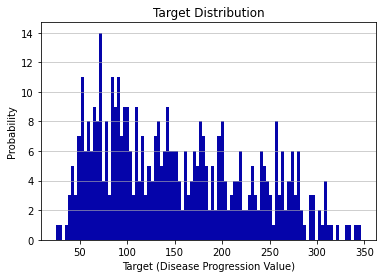

In [ ]:
#histogram of target variable
n, bins, patches = plt.hist(x = diabetes.target, bins = 100, color = '#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Target (Disease Progression Value)')
plt.ylabel('Probability')
plt.title('Target Distribution')
plt.show()

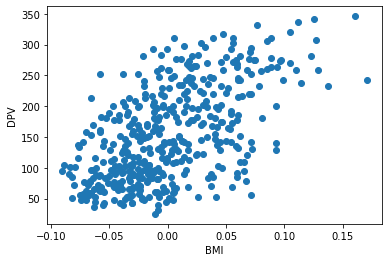

In [ ]:
#create scatter plot of BMI vs DPV
plt.scatter(df.bmi, diabetes.target)
plt.xlabel('BMI')
plt.ylabel('DPV')
plt.show()

In [ ]:
#print correlation matrix
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

print(vif_data)

  feature        VIF
0     age   1.217307
1     sex   1.278073
2     bmi   1.509446
3      bp   1.459429
4      s1  59.203786
5      s2  39.194379
6      s3  15.402352
7      s4   8.890986
8      s5  10.076222
9      s6   1.484623


From the information above, we can see that there are no null values in our datasets. The scatterplot suggests that there may be a positive correlation between BMI and DPV.

The variable inflation factors (VIF) were determined and interpreted using information from https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/. We can see that s1, s2, s3, s4, and s5 all have high VIF values which means they can be predicted by other independent variables from the dataset. However, this is not an issue because this collinearity makes sense. Each s value is a separate blood serum measurement. Therefore, each measurement will be correlated with one another because they are simply separate trials of the same data.

#Models

##Linear Regression Model

In [ ]:
#set values for x and y
x = df['bmi'].astype(float)
y = diabetes['target'].astype(float)

In [ ]:
# Split the data into training/testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.3, random_state = 100)

Intercept: 
 154.2349433460233
Coefficients: 
 [967.87658949]


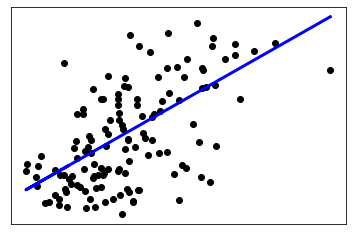

In [ ]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x_train.values.reshape(-1,1), y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(x_test.values.reshape(-1, 1))

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)


# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
print('R squared: {:.2f}'.format(regr.score(x.values.reshape(-1, 1),y)*100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, diabetes_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, diabetes_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, diabetes_y_pred)))

R squared: 34.30
Mean Absolute Error: 48.15683861520791
Mean Squared Error: 3549.670037631086
Root Mean Squared Error: 59.57910739203035


Since the r squared value is so low and the mean square error and root mean square error are so high, that means our model is not very accurate. We can see this illustrated in the graph as our regression line is pretty far away from a lot of the data points.

Regression Formula: y = 967.88x + 154.23

We cannot accept this model because the r squared value is so low and the mean squared error and root mean squared error are so high.

##Multiple Linear Regression Model 1
I used information from https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c to create and evaluate the following multiple linear regression models 1 and 2.

In [ ]:
#set values for x and y
x = df[['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']].astype(float)
y = diabetes['target'].astype(float)

I used information from https://realpython.com/train-test-split-python-data/ to split my data into training and testing sets.

In [ ]:
# Split the data into training/testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.3, random_state = 100)

In [ ]:
#create a multiple linear regression model
mlr = LinearRegression()
mlr.fit(x_train,y_train)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  153.75563912747964
Coefficients:


[('age', -25.02261506459551),
 ('sex', -205.00570353407514),
 ('bmi', 572.7009488964303),
 ('bp', 308.49904646090295),
 ('s1', -1000.9232071956375),
 ('s2', 606.542534986927),
 ('s3', 207.39582001207057),
 ('s4', 135.22404128454585),
 ('s5', 902.9697424731414),
 ('s6', 55.5220897319422)]

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 76.88488236  50.25812435 175.14287653  88.21510972 117.11300021
 110.98491886 171.19515271 255.58399269 111.57003394 215.36433896
 210.98979952 174.57318179 211.33384774 221.74152829 111.53668561
 142.70463631  58.83124606  97.17384706 198.42778416 157.89098102
 261.64655136 219.93748095  96.41533644 154.7973767  238.20808117
 122.46601701 298.91256572 122.16061922 188.53138471 177.64946413
 130.57821962 148.0325883  130.36884485 135.17819236 184.08091312
 185.49053968 228.82256143 163.65954486 238.43805647 200.36784216
 137.26077024 156.44904394  81.04495702 144.25023072  73.03533525
 198.02173772 140.03223537 102.30614454 228.56843802 128.75655219
 257.31159699  70.51397922 215.18114014 148.45921736  80.37212432
 162.32872849 102.99827673 296.39541841  80.02541928 136.69009211
  96.30084945 152.17304243 111.57015006 238.85889145 174.51474456
 136.04787633 123.8688745  111.86813701  73.28169416 131.51903679
 133.40061407  69.25736649  73.53116224 201.2919439

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
0,42.0,76.884882
1,72.0,50.258124
2,139.0,175.142877
3,74.0,88.215110
4,109.0,117.113000


In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 51.37
Mean Absolute Error: 42.002427955158495
Mean Square Error: 2687.151642788792
Root Mean Square Error: 51.83774341914192


Since the r squared value is so low and the mean square error and root mean square error are so high, that means our model is not very accurate. We can see this illustrated in the table comparing actual values to predicted values. 

Regression line formula: y = 153.756 - 25.02(age) -205(sex) + 572.7(bmi) + 308.5(bp) - 1000.92(s1) + 606.54(s2) + 207.4(s3) + 135.22(s4) + 902.97(s5) + 55.52(s6)

We should not accept this model because the r squared value is extremely low, and the mean square error and root mean square errors are extremely high.

##Multiple Linear Regression Model 2 <br>
For the following Regression Model, we ommit values s2-s6. This gives us an understanding of the data without any collineated independent variables.

In [ ]:
#set values for x and y
x = df[['age','sex','bmi','bp','s1']].astype(float)
y = diabetes['target'].astype(float)

In [ ]:
# Split the data into training/testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.3, random_state = 100)

In [ ]:
#create a multiple linear regression model
mlr = LinearRegression()
mlr.fit(x_train,y_train)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  153.5853303837561
Coefficients:


[('age', 23.118799367026906),
 ('sex', -104.1682360991473),
 ('bmi', 830.9772912137311),
 ('bp', 396.8731794479228),
 ('s1', 48.476691749610524)]

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 87.7205623   54.48875359 181.95113322  76.65577016 144.40291393
 149.13513447  97.85225543 213.44242749 110.95652009 222.32780145
 174.40156932 190.54525451 225.58320258 228.51180046  94.66115656
 132.59900847  62.55045334 123.4012803  189.04321219 186.11598525
 230.62063921 216.36274983  90.22230605 176.53248064 210.31294629
  90.35712192 279.95452138 129.37544734 184.72507356 166.52650889
 138.35881845 179.96415479 128.62920461  98.84892713 123.25246251
 182.45996386 226.79780359 138.88103562 195.45787548 239.04009512
  97.39002496 190.51435228  75.82407488 142.31135759  91.76213621
 138.73597428 182.12298552  75.04620081 234.5848406  163.19688428
 228.74292346 101.39495535 179.52701294 132.25444401 111.98811316
 142.04820751  47.19009808 276.04123138 119.85836517  92.30676389
 123.97173198 110.53642235 179.03622566 201.38745404 179.56704159
 142.87652857 114.978818   121.78861379  69.08317734 157.61932545
 110.23395192  82.78123179  99.77020984 179.8640617

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
0,42.0,87.720562
1,72.0,54.488754
2,139.0,181.951133
3,74.0,76.655770
4,109.0,144.402914


In [ ]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 39.97
Mean Absolute Error: 46.43158349701737
Mean Square Error: 3218.553358595357
Root Mean Square Error: 56.732295551963674


The r squared value for this regression model is even smaller than it was for the previous regression model, and the mean square error and root mean square error are even higher than in the previous regression model. Therefore, this regression model is highly inaccurate.

Regression line formula: y = 153.585 + 23.12(age) - 104.17(sex) + 830.98(bmi) + 396.87(bp) + 48.48(s1)

We should not accept this model because it is highly inaccurate due to the r squared value being extremely low, and the mean square error and root mean square errors being extremely high.

#Conclusions <br>
The linear regression models in this lab were inaccurate and therefore unsuccessful at answering the business question. The r squared value of all the models was very low while the mean square error and root mean square errors were all very high. If we were to continue analyzing this data, it might be best to use different models, or we could try more regression models after eliminating outliers or changing the independent variables that we include. 